<a href="https://colab.research.google.com/github/Ankit23232/AI/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/diabetes (1).csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_to_clean] = data[columns_to_clean].replace(0, np.nan)
data.fillna(data.median(), inplace=True)

In [ ]:
X = data.drop('BloodPressure', axis=1)
y = data['BloodPressure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 112.13
R-squared Score: 0.23


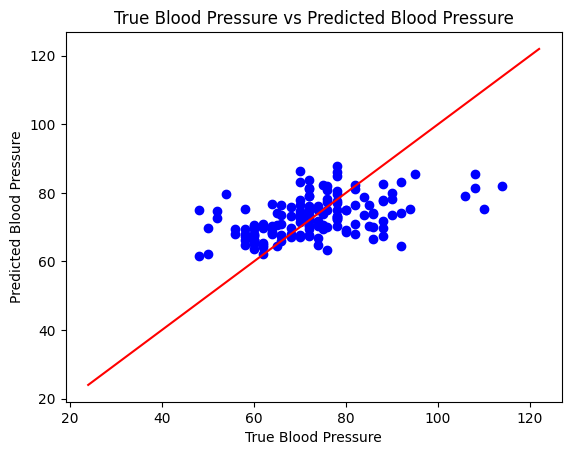

                    Feature  Coefficient
0               Pregnancies     0.048294
1                   Glucose     0.046574
2             SkinThickness     0.019627
3                   Insulin    -0.007965
4                       BMI     0.467673
5  DiabetesPedigreeFunction    -1.103913
6                       Age     0.313898
7                   Outcome    -1.428496


In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('True Blood Pressure')
plt.ylabel('Predicted Blood Pressure')
plt.title('True Blood Pressure vs Predicted Blood Pressure')
plt.show()

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

In [ ]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Results:
Accuracy: 0.08
Classification Report:
               precision    recall  f1-score   support

        48.0       0.00      0.00      0.00         2
        50.0       0.00      0.00      0.00         2
        52.0       0.00      0.00      0.00         2
        54.0       0.00      0.00      0.00         1
        56.0       0.00      0.00      0.00         2
        58.0       0.00      0.00      0.00         6
        60.0       0.40      0.18      0.25        11
        62.0       0.13      0.33      0.19         6
        64.0       0.14      0.43      0.21         7
        65.0       0.00      0.00      0.00         3
        66.0       0.00      0.00      0.00         6
        68.0       0.00      0.00      0.00         5
        70.0       0.11      0.09      0.10        11
        72.0       0.08      0.14      0.11        21
        74.0       0.00      0.00      0.00         8
        75.0       0.00      0.00      0.00         4
        76.0 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true s

In [ ]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("\nK-Nearest Neighbors Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Results:
Accuracy: 0.03
Classification Report:
               precision    recall  f1-score   support

        24.0       0.00      0.00      0.00         0
        40.0       0.00      0.00      0.00         0
        44.0       0.00      0.00      0.00         0
        46.0       0.00      0.00      0.00         0
        48.0       0.00      0.00      0.00         2
        50.0       0.00      0.00      0.00         2
        52.0       0.00      0.00      0.00         2
        54.0       0.00      0.00      0.00         1
        55.0       0.00      0.00      0.00         0
        56.0       0.00      0.00      0.00         2
        58.0       0.20      0.17      0.18         6
        60.0       0.12      0.09      0.11        11
        61.0       0.00      0.00      0.00         0
        62.0       0.00      0.00      0.00         6
        64.0       0.00      0.00      0.00         7
        65.0       0.00      0.00      0.00         3
        66.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Text(627.9949494949494, 0.5, 'Actual')

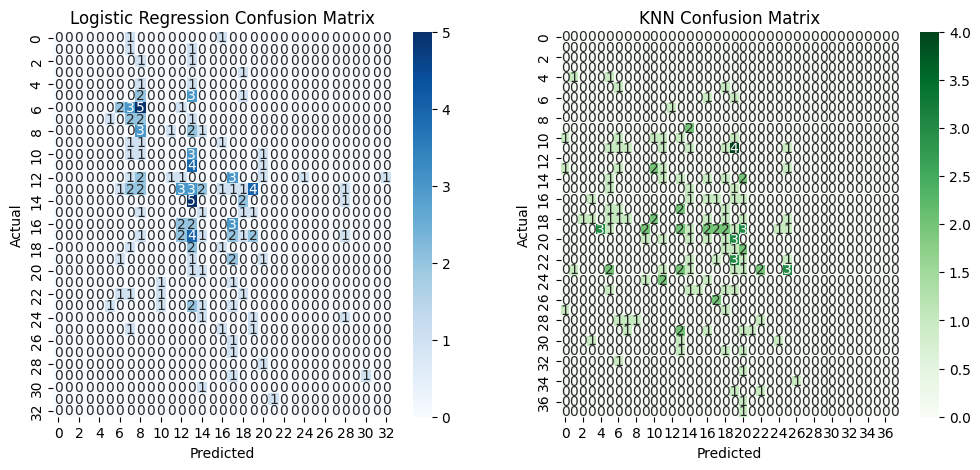

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("KNN Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()